#Rain in Australia

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means "did it rain the next day, Yes or No?" This column is Yes if the rain for that day was 1mm or more.

The goal is to predict next-day rain by training classification models on the target variable RainTomorrow.

***Basic part goal***: build a binary classifier to predict whether or not it will rain tomorrow using Logistic Regression implemented with Scikit-Learn. After that, try to improve the model with some techniques seen during the course.

***Advanced part goal***: try to improve the previous model by building an ANN MPL (Artificial Neural Network Multi Perceptron Layer) using Keras and other more widely used models such as Random Forest and XGBoost.
________________________________

Matteo Vezzelli, PhD Student in Physics, University of Bologna

Course: Applied Machine Learning Basic and Advanced (A.Y. 2021/2022)

## Basic part

### Dataset Exploration

In [1]:
'''
# Download dataset from Kaggle (optional)

! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download -d jsphyg/weather-dataset-rattle-package
! unzip weather-dataset-rattle-package.zip -d Rain_Australia
'''

'\n# Download dataset from Kaggle (optional)\n\n! pip install -q kaggle\n! mkdir ~/.kaggle\n! cp kaggle.json ~/.kaggle/\n! chmod 600 ~/.kaggle/kaggle.json\n! kaggle datasets list\n! kaggle datasets download -d jsphyg/weather-dataset-rattle-package\n! unzip weather-dataset-rattle-package.zip -d Rain_Australia\n'

In [2]:
# Get Reproducible Results within the notebook
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)

In [3]:
import pandas as pd

In [4]:
# I think it is much easier to import the dataset from my github repository than from kaggle itself
data = 'https://raw.githubusercontent.com/mtvz42/Rain-Australia/main/weatherAUS.csv'
df = pd.read_csv(data)

In [5]:
df.shape

(145460, 23)

There are 145460 instances (samples, observations) and 23 features (attributes, measurements)

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
col_names = df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

From the dataset summary I can see that there are some numerical (float64) and categorical (object) values, and some missing values.

Some statistic

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Notes:

df.describe() excludes character variables

If you want to view the statistical properties of character variables, you should run df.describe(include=['object'])

If you want to view the statistical properties of all the variables, you should run df.describe(include='all')

### Univariate Analysis 

The target vaiable is 'RainTomorrow' so I want to explore it.

In [10]:
# Are there any missing values (NaN)?
df['RainTomorrow'].isnull().sum()

3267

In [11]:
# RainTomorrow has 3267 missing values. As RainTomorrow is to be predicted there must be no missing values. 
# Thus, I have to drop the the rows with missing values.
df = df.dropna(subset = ['RainTomorrow'])

In [12]:
# Which are the unique values?
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
# How many 'Yes' and 'No'?
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

### Bivariate Analysis

I want to explore the data set in categorical and numeric variables. Categorical variables have the object data type, while numeric variables have the float64 data type.

In [14]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [15]:
# how many missing values?
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

I want to check the number of labels within each variable.
A large number of labels within a variable is known as high cardinality. High cardinality can create serious problems for the machine learning model. Therefore, I will check for high cardinality.

In [16]:
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


The Date variable contains an excessive number of variables and must be preprocessed. 
All other variables contain relatively fewer variables.
I therefore begin to handle the Date variable.

In [17]:
df['Date'].dtypes

dtype('O')

The data type of Date variable is object, so I will parse 'Date' into datetime format.

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [20]:
df['Month'] = df['Date'].dt.month
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [21]:
df['Day'] = df['Date'].dt.day
df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

Re-check the information on the dataframe

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

There are three additional columns (Day, Month, Year) created from Date variable. Now, I will drop the original Date variable from the dataset.

In [23]:
df.drop('Date', axis=1, inplace = True)

Now the number of categorical variables should be 6, because I eliminated "Date."

In [24]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Categorical input features must generally be encoded, so it is necessary to explore each categorical variable one by one.

----------Location----------

In [25]:
print('Location contains', len(df.Location.unique()), 'labels')
df.Location.unique()

Location contains 49 labels


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

There are no missing values.
I proceed with OHE (one hot encoding) and get k-1 dummy variables (i.e., variables that take the values 0 and 1, where the values indicate the presence or absence of something).

In [26]:
pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


----------WindGustDir----------

In [27]:
print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')
df['WindGustDir'].unique()

WindGustDir contains 17 labels


array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

There are some missing values.
I proceed with OHE and get k-1 dummy variables. I also need to add an additional dummy variable to indicate the presence of missing data.

In [28]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


----------WindDir9am----------

In [29]:
print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')
df['WindDir9am'].unique()

WindDir9am contains 17 labels


array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [30]:
# here as before
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


----------WindDir3pm----------

In [31]:
print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')
df['WindDir3pm'].unique()

WindDir3pm contains 17 labels


array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [32]:
# here as before
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


----------RainToday----------

In [33]:
print('RainToday contains', len(df['RainToday'].unique()), 'labels')
df['RainToday'].unique()

RainToday contains 3 labels


array(['No', 'Yes', nan], dtype=object)

In [34]:
# here as before
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


Now, I want to explore the numerical variables

In [35]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [36]:
# how many missing vaues?
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

Are there any outliers?

In [37]:
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

It seems that the Rainfall, Evaporation, WindSpeed9am, and WindSpeed3pm columns may contain outliers (e.g., the maximum value is much larger than the average value).

I would like a better visualization using boxplots.

Text(0, 0.5, 'WindSpeed3pm')

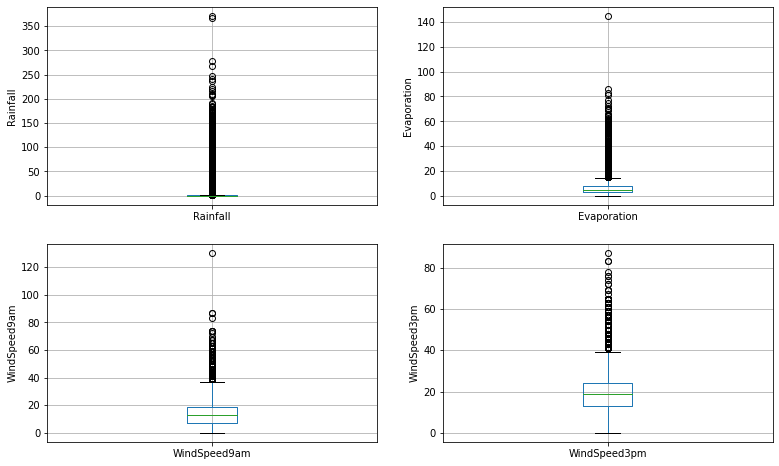

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,8))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

I will plot the histograms to check the distributions and find out if they are normal distributed or skewed.

Text(0, 0.5, 'RainTomorrow')

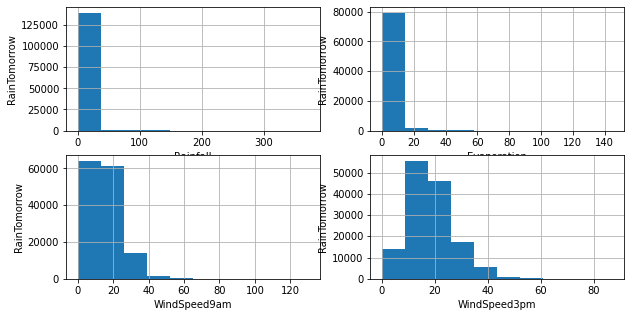

In [39]:
plt.figure(figsize=(10,5))

plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

All four variables are skewed, so I will use the interquartile range to find the outliers.
The interquartile range is the difference between the third (0.75) and first (0.25) quartiles, that is, the width of the range of values that contains half of the observed values.

In [40]:
iqr = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (iqr * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (iqr * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [41]:
iqr = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (iqr * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (iqr * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [42]:
iqr = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (iqr * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (iqr * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


In [43]:
iqr = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (iqr * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (iqr * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


For Rainfall, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

For Evaporation, the minimum and maximum values are 0.0 and 145.0. So, the outliers are values > 21.8.

For WindSpeed9am, the minimum and maximum values are 0.0 and 130.0. So, the outliers are values > 55.0.

For WindSpeed3pm, the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 57.0.

### Multivariate Analysis

I want to discover patterns and relationships between variables in the dataset, and I will use a heat map.

In [44]:
correlation = df.corr()

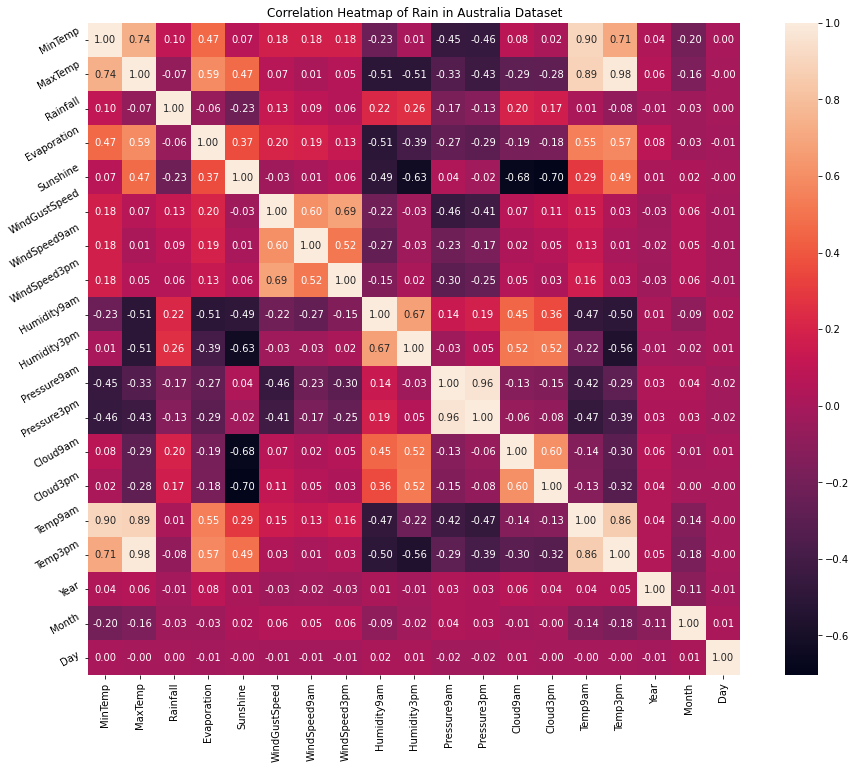

In [45]:
import seaborn as sns
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

Some insights:

* The best positive correlation is given by MaxTemp and Temp3pm (0.98). This means that the daily maximum temperature is reached around 3 p.m. (among the measured data).

* Another best positive correlation is given by MinTemp and Temp9am (0.90). It means that the daily minimum temperature is reached around 9 p.m. (among the measured data).

* Another best positive correlation is given by Pressure9am and Pressure3pm (0.96). It means that pressure at 9am and 3pm is about the same (among the measured data).

### Training-set and Test-set splitting

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop(['RainTomorrow'], axis=1)   # dropping RainTomorrow from the Dataframe
y = df['RainTomorrow']                  # create the target variable RainTomorrow

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
X_train.shape, X_test.shape

((113754, 24), (28439, 24))

In [48]:
y_train.shape, y_test.shape

((113754,), (28439,))

### Feature Engineering

This is the process of transforming the raw data into useful features that help to better understand the model and increase its predictive power.

First, I will re-display the categorical and numerical variables separately.

In [49]:
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [50]:
# display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [51]:
# display numerical variables
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

Missing values in numerical variables 

In [52]:
# check missing values in numerical variables in X_train
X_train[numerical].isnull().sum()

MinTemp            525
MaxTemp            268
Rainfall          1182
Evaporation      48791
Sunshine         54345
WindGustSpeed     7406
WindSpeed9am      1083
WindSpeed3pm      2109
Humidity9am       1420
Humidity3pm       2913
Pressure9am      11257
Pressure3pm      11225
Cloud9am         43041
Cloud3pm         45767
Temp9am            736
Temp3pm           2206
Year                 0
Month                0
Day                  0
dtype: int64

In [53]:
# check missing values in numerical variables in X_test
X_test[numerical].isnull().sum()

MinTemp            112
MaxTemp             54
Rainfall           224
Evaporation      12052
Sunshine         13471
WindGustSpeed     1864
WindSpeed9am       265
WindSpeed3pm       521
Humidity9am        354
Humidity3pm        697
Pressure9am       2757
Pressure3pm       2756
Cloud9am         10616
Cloud3pm         11327
Temp9am            168
Temp3pm            520
Year                 0
Month                0
Day                  0
dtype: int64

I assume that the data are completely missing at random (MCAR). There are two methods that can be used to impute missing values: 
* mean or median imputation
* random sample imputation 

If there are outliers in the data set, it is advisable to use median imputation because it is robust to them.

Imputation should be performed on the training set and then propagated to the test set. This means that the statistical measures to be used to fill in missing values in both the training set and the test set should be extracted only from the training set. This is to avoid overfitting.

In [54]:
# impute missing values in X_train and X_test with respective column median in X_train
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)  

In [55]:
# check again missing values in numerical variables in X_train
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [56]:
# check missing values in numerical variables in X_test
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

Missing values in categorical variables

In [57]:
# percentage of missing values in the categorical variables in X_train
X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.065563
WindDir9am     0.070644
WindDir3pm     0.026575
RainToday      0.010391
dtype: float64

In [58]:
# categorical variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.06556252966928636
WindDir9am 0.07064366967315434
WindDir3pm 0.02657488967420926
RainToday 0.010390843398913444


In [59]:
# impute missing values in categorical variables with most frequent value
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [60]:
'''
# this is already done in Univariate Analisys in which I removed the missing values directly from the 'RainTomorrow' column 

# impute missing values in y_train and y_test, better to remove the NaN values
for df1 in y_train: 
  df1.fillna(y_train.value_counts().idxmax(), inplace=True)
'''

"\n# this is already done in Univariate Analisys in which I removed the missing values directly from the 'RainTomorrow' column \n\n# impute missing values in y_train and y_test, better to remove the NaN values\nfor df1 in y_train: \n  df1.fillna(y_train.value_counts().idxmax(), inplace=True)\n"

In [61]:
# check missing values in categorical variables in X_train
X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [62]:
# check missing values in categorical variables in X_test
X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [63]:
# last check in X_train
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [64]:
# last check in X_test
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [65]:
# last check in y_train
y_train.isnull().sum()

0

In [66]:
# last check in y_test
y_test.isnull().sum()

0

Outliers in numerical variables

The columns Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm contain outliers. I want to limit the maximum values and remove the outliers from the above variables.

In [67]:
import numpy as np

def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [68]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [69]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [70]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [71]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [72]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.00000,113754.000000,113754.000000,113754.000000
mean,12.175225,23.221349,0.677010,5.143557,7.993989,39.895063,13.980124,18.629719,68.839434,51.480317,1017.646309,1015.252305,4.647652,4.701452,16.981340,21.67070,2012.757802,6.400891,15.707826
std,6.384019,7.109859,1.185327,2.814837,2.758049,13.127684,8.815668,8.691237,18.944168,20.531492,6.750345,6.683925,2.292660,2.118964,6.470597,6.87257,2.541504,3.423346,8.797404
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.70000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.30000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1038.900000,8.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


Now the outliers in the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns are limited.

Encoding categorical variables

In [73]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [74]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
18401,NorahHead,SSW,NW,W,No
127797,Walpole,WSW,WNW,W,Yes
40012,Williamtown,ENE,W,E,No
130914,Hobart,WNW,WNW,WNW,No
41742,Williamtown,S,SW,SSE,No


In [75]:
# encode RainToday variable, that is the encoding in binary 0,1 instead of 'Yes' and 'No'
! pip install --upgrade category_encoders
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 6.5 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [76]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
18401,NorahHead,15.1,23.9,0.0,4.8,8.4,SSW,67.0,NW,W,...,1002.4,5.0,5.0,19.8,14.3,0,1,2009,10,14
127797,Walpole,9.7,14.2,3.2,4.8,8.4,WSW,50.0,WNW,W,...,1007.7,5.0,5.0,11.1,13.4,1,0,2011,9,26
40012,Williamtown,13.2,25.4,0.0,3.2,8.8,ENE,30.0,W,E,...,1021.5,6.0,5.0,21.2,24.0,0,1,2010,4,20
130914,Hobart,7.6,14.8,0.0,4.0,7.0,WNW,94.0,WNW,WNW,...,1001.4,5.0,5.0,11.1,12.9,0,1,2011,7,12
41742,Williamtown,12.9,22.2,0.0,4.0,7.9,S,37.0,SW,SSE,...,1021.2,6.0,2.0,18.8,20.6,0,1,2015,4,13


RainToday_0 and RainToday_1 are created from RainToday variable.

Now, I will create the X_train and X_test set.

In [77]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [78]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
18401,15.1,23.9,0.0,4.8,8.4,67.0,19.0,22.0,38.0,68.0,...,0,0,0,0,0,0,0,1,0,0
127797,9.7,14.2,3.2,4.8,8.4,50.0,15.0,28.0,91.0,56.0,...,0,0,0,0,0,0,0,1,0,0
40012,13.2,25.4,0.0,3.2,8.8,30.0,6.0,17.0,79.0,63.0,...,0,0,0,0,0,0,0,0,0,0
130914,7.6,14.8,0.0,4.0,7.0,94.0,30.0,35.0,52.0,45.0,...,0,0,0,0,0,0,0,0,1,0
41742,12.9,22.2,0.0,4.0,7.9,37.0,15.0,20.0,69.0,52.0,...,0,0,0,0,1,0,0,0,0,0


In [79]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [80]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
57760,7.1,13.0,3.2,4.8,8.4,41.0,24.0,22.0,100.0,98.0,...,0,0,0,0,0,0,0,0,1,0
127128,13.2,18.3,0.0,4.8,8.4,48.0,24.0,20.0,73.0,73.0,...,0,0,0,0,0,0,0,0,0,0
119994,9.2,22.7,0.0,5.0,11.1,52.0,26.0,20.0,45.0,25.0,...,0,0,0,0,0,0,0,0,0,0
7088,15.3,26.1,0.0,10.4,8.4,44.0,24.0,19.0,48.0,40.0,...,0,0,0,0,0,0,0,0,0,0
62992,11.9,31.8,0.0,5.0,4.1,72.0,6.0,19.0,89.0,25.0,...,0,0,0,0,0,0,0,0,0,0


The training set and the test set are ready for model building. Before that, it is necessary that all feature variables have the same scale. This operation is called feature scaling.

### Feature Scaling

In [81]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.00000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.175225,23.221349,0.677010,5.143557,7.993989,39.895063,13.980124,18.629719,68.839434,51.480317,...,0.05431,0.059699,0.067567,0.101183,0.065114,0.056534,0.064481,0.069562,0.060763,0.065694
std,6.384019,7.109859,1.185327,2.814837,2.758049,13.127684,8.815668,8.691237,18.944168,20.531492,...,0.22663,0.236929,0.251002,0.301573,0.246728,0.230952,0.245609,0.254409,0.238896,0.247748
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The feature have different scales...

In [82]:
from sklearn.preprocessing import MinMaxScaler
cols = X_train.columns
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.00000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.487623,0.529704,0.211566,0.235943,0.551310,0.262752,0.254184,0.326837,0.688394,0.514803,...,0.05431,0.059699,0.067567,0.101183,0.065114,0.056534,0.064481,0.069562,0.060763,0.065694
std,0.150566,0.134402,0.370415,0.129121,0.190210,0.101765,0.160285,0.152478,0.189442,0.205315,...,0.22663,0.236929,0.251002,0.301573,0.246728,0.230952,0.245609,0.254409,0.238896,0.247748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.429112,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.483491,0.517958,0.000000,0.220183,0.579310,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.596698,0.623819,0.187500,0.247706,0.600000,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now all the features are scaled between 0 and 1

### Model Training

Now the X_train data set is ready to be entered into the Logistic Regression classifier.

In [83]:
# avoid warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=42)

# calculate execution time
import time
start = time.time()

# fit the model
logreg.fit(X_train, y_train)

# calculate execution time
end = time.time()
diff = (end - start)/60
print('Execution time with CPU (min): %.2f' % diff)

Execution time with CPU (min): 0.04


### Predict Results

In [84]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [85]:
# how many 'Yes' and 'No' ?
import numpy as np
array = np.array(y_pred_test)
count = np.unique(array, return_counts=True)
count

(array(['No', 'Yes'], dtype=object), array([23904,  4535]))

* No rain: 23904 predictions
* Yes rain: 4535 predictions

In [86]:
# probability of getting output as 0 (no rain)
no_rain = logreg.predict_proba(X_test)[:,0]
no_rain

array([0.15163612, 0.70369125, 0.98254881, ..., 0.98586214, 0.94954345,
       0.95416033])

In [87]:
# probability of getting output as 1 (yes rain)
yes_rain = logreg.predict_proba(X_test)[:,1]
yes_rain

array([0.84836388, 0.29630875, 0.01745119, ..., 0.01413786, 0.05045655,
       0.04583967])

In [88]:
# merging the 3 1-D-arrays into one 3D-array 
merged_array = np.array([no_rain, yes_rain, y_pred_test]).T

# create a dataframe
column_values = ['no_rain_proba', 'yes_rain_proba', 'prediction']
dataframe = pd.DataFrame(data = merged_array, columns = column_values)
dataframe

,no_rain_proba,yes_rain_proba,prediction
0,0.151636,0.848364,Yes
1,0.703691,0.296309,No
2,0.982549,0.017451,No
3,0.869121,0.130879,No
4,0.613986,0.386014,No
...,...,...,...
28434,0.354269,0.645731,Yes
28435,0.973871,0.026129,No
28436,0.985862,0.014138,No
28437,0.949543,0.050457,No


I see that there are 23904 forecasts for No-rain and 4535 forecasts for Yes-rain. I also created a Dataframe to better read the values. Here, when the predicted probability is higher, the model predicts the correct outcome.

### Accuracy Score

In [89]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8455


y_test are the labels of the true classes and y_pred_test are the labels of the classes expected in the test set.

Now I will compare the accuracy of the training set and the test set to check for overfitting.

In [90]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [91]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8483


Check for overfitting and underfitting 

In [92]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8483
Test set score: 0.8455


These two values are quite comparable, so there is no overfitting problem.

In Logistic Regression, the default value is C=1. It gives good performance with an accuracy of about 85% on both the training set and the test set. But the performance of the model on both the training set and the test set is very similar. This is probably a case of underfitting.

I will increase C and fit a more flexible model.

In [93]:
# fit the Logsitic Regression model with C=100
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=42)

# calculate execution time
start = time.time()

# fit the model
logreg100.fit(X_train, y_train)

# calculate execution time
end = time.time()
diff = (end - start)/60
print('Execution time with CPU (min): %.2f' % diff)

Execution time with CPU (min): 0.04


In [94]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8488
Test set score: 0.8456


C=100 produces slightly higher accuracy on the test set and the training set. Thus, I can conclude that a more complex model should perform slightly better.

What happens if I use C=0.01 ?

In [95]:
# fit the Logsitic Regression model with C=001
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=42)

# calculate execution time
start = time.time()

# fit the model
logreg001.fit(X_train, y_train)

# calculate execution time
end = time.time()
print('Execution time (s): ', end - start)

Execution time (s):  1.2023911476135254


In [96]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8426
Test set score: 0.8393


In this case, both the accuracy of the training and the accuracy of the test set decrease from the default parameters. Thus, a more regularized model is worse.

----------Compare model accuracy with null accuracy----------

A good test is to compare the model with zero accuracy, that is, the accuracy that could be obtained by always predicting the most frequent class.

So, first I need to check the distribution of classes in the test set.

In [97]:
y_test.value_counts()

No     22098
Yes     6341
Name: RainTomorrow, dtype: int64

So the occurrences of the most frequent class are 22098. Then I can calculate the null accuracy by dividing 22098 by the total number of occurrences.

In [98]:
null_accuracy = (22098/(22098+6341))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7770


The accuracy score of the model is 0.8455, but the accuracy score of the null model is 0.7770. Therefore, I can conclude that the logistic regression model is doing a very good job in predicting class labels.

However, it does not give the underlying distribution of values. It also says nothing about the type of errors made by our classifier.

There is another tool, called a confusion matrix, that could be used.

### Confusion Matrix

The confusion matrix is a tool for summarizing the performance of a classification algorithm, providing insight into the performance of the classification model and the types of errors produced by the model. It provides a summary of correct and incorrect predictions broken down by each category. The summary is represented in tabular form.
Four types of results (true positive, false positive, true negative, false negative) are possible in evaluating the performance of a classification model.

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20804  1294]
 [ 3100  3241]]

True Positives(TP) =  20804

True Negatives(TN) =  3241

False Positives(FP) =  1294

False Negatives(FN) =  3100


The confusion matrix shows 20804+3241=24045 correct predictions and 3100+1294=4394 incorrect predictions.

Remember that:


*   True positive (actual positive:1 and predict positive:1)
*   True negative (actual negative:0 and predicted negative:0)


*   False positive (actual negative:0 and predict positive:1)
*   False negative (actual positive:1 and predict negative:0)





Classification accuracy and error

In [100]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification accuracy : 0.8455
Classification error : 0.1545


### Precision and Recall

Precision: percentage of correctly predicted positive outcomes out of all predicted positive outcomes. It can be stated as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).


In [101]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9414


Recall: percentage of correctly predicted positive outcomes out of all true positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN).

In [102]:
recall = TP / float(TP + FN)
print('Recall: {0:0.4f}'.format(recall))

Recall: 0.8703


### Threshold Level

In [103]:
# print the first 10 predicted probabilities of two classes 0 and 1
y_pred_prob = logreg.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.15163612, 0.84836388],
       [0.70369125, 0.29630875],
       [0.98254881, 0.01745119],
       [0.86912056, 0.13087944],
       [0.6139856 , 0.3860144 ],
       [0.94498632, 0.05501368],
       [0.9547039 , 0.0452961 ],
       [0.5290206 , 0.4709794 ],
       [0.99863574, 0.00136426],
       [0.7881954 , 0.2118046 ]])

In each row, the numbers are equal to 1.
The two columns correspond to classes 0 (expected probability of no rain tomorrow) and 1 (expected probability of rain tomorrow).

There is a classification threshold level of 0.5.

Class 1 - the probability of rain is expected if the probability is > 0.5.

Class 0 - the probability of no rain is expected if the probability is < 0.5.

In [104]:
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['No_rain_tomorrow_prob(0)', 'Rain_tomorrow_prob(1)'])
y_pred_prob_df

,No_rain_tomorrow_prob(0),Rain_tomorrow_prob(1)
0,0.151636,0.848364
1,0.703691,0.296309
2,0.982549,0.017451
3,0.869121,0.130879
4,0.613986,0.386014
5,0.944986,0.055014
6,0.954704,0.045296
7,0.529021,0.470979
8,0.998636,0.001364
9,0.788195,0.211805


In [105]:
# print the first 10 predicted probabilities for class 1 - Probability of rain
logreg.predict_proba(X_test)[0:10, 1]

array([0.84836388, 0.29630875, 0.01745119, 0.13087944, 0.3860144 ,
       0.05501368, 0.0452961 , 0.4709794 , 0.00136426, 0.2118046 ])

In [106]:
# store the predicted probabilities for class 1 - Probability of rain
y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

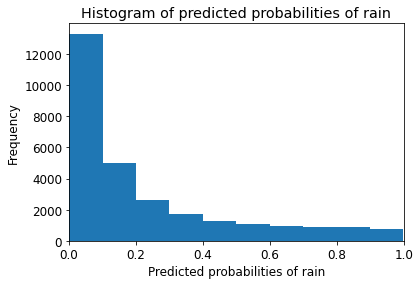

In [107]:
# plot histogram of predicted probabilities

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

The histogram is strongly skewed in the positive direction.
* The first column indicates that there are about >12000 observations with probability between 0.0 and 0.1. 
* There are few observations with probability >0.5.
* There are a small number of observations with probability >0.5. 

So, this small number of observations predicts that there will be rain tomorrow.
This small number of observations predicts that there will be rain tomorrow.
Most observations predict that there will be no rain tomorrow.

What happens if I lower the threshold?

In [108]:
from sklearn.preprocessing import binarize

for i in range(1,10):
  cm1=0
  y_pred1 = logreg.predict_proba(X_test)[:,1]
  y_pred1 = y_pred1.reshape(-1,1)
  y_pred2 = binarize(y_pred1, threshold=i/10, copy=True)
  y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
  cm1 = confusion_matrix(y_test, y_pred2)
  print('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
        'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
        cm1[0,1],'Type I errors (False Positives), ','\n\n',
        cm1[1,0],'Type II errors (False Negatives), ','\n\n',
        'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
        '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[12741  9357]
 [  558  5783]] 

 with 18524 correct predictions,  

 9357 Type I errors (False Positives),  

 558 Type II errors (False Negatives),  

 Accuracy score:  0.6513590491930096 



With 0.2 threshold the Confusion Matrix is  

 [[16976  5122]
 [ 1306  5035]] 

 with 22011 correct predictions,  

 5122 Type I errors (False Positives),  

 1306 Type II errors (False Negatives),  

 Accuracy score:  0.7739723618973944 



With 0.3 threshold the Confusion Matrix is  

 [[18962  3136]
 [ 1929  4412]] 

 with 23374 correct predictions,  

 3136 Type I errors (False Positives),  

 1929 Type II errors (False Negatives),  

 Accuracy score:  0.8218995042019761 



With 0.4 threshold the Confusion Matrix is  

 [[20105  1993]
 [ 2513  3828]] 

 with 23933 correct predictions,  

 1993 Type I errors (False Positives),  

 2513 Type II errors (False Negatives),  

 Accuracy score:  0.8415556102535251 



With 0.5 threshold the Confusion 

The best accuracy remains with a threshold of 0.5, which is the default value used in the original model. This value is used to convert predicted probabilities into class predictions.

### ROC and AUC

The ROC (Receiver Operating Characteristic Curve) is another tool to visually measure the performance of the classification model. It is a graph showing the performance of a classification model at various classification threshold levels.

The ROC curve plots the rate of true positives (TPR) against the rate of false positives (FPR) at various threshold levels.

The true positive rate (TPR), also called recall, is defined as the ratio of TP to (TP + FN).

The false positive rate (FPR) is defined as the ratio of FP to (FP + TN).

For example, if the threshold levels are lower, more items may be classified as positive. Both true positives (TP) and false positives (FP) will increase.

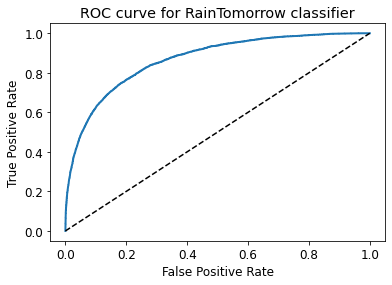

In [109]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

ROC curve helps to choose a threshold level that balances TP rate and FP rate.

ROC AUC (Receiver Operating Characteristic - Area Under Curve) is a technique for comparing the performance of classifiers that measures the area under the curve. A perfect classifier will have an area of 1, while a purely random classifier will have an area of 0.5.
Thus, the ROC AUC is the percentage of the ROC plot that is under the curve.

In [110]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8661


ROC AUC of the model approaches towards 1. So, the classifier does a good job in predicting whether it will rain tomorrow or not.

In [111]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8711


Even better when considering cross validation.

### Model Improvements

A first possibility is to use **Recursive Feature Elimination with Cross Validation**.
This technique selects the best subset of features for the estimator by removing 0 to N features iteratively using recursive feature elimination and fitting the model multiple times.

In [112]:
from sklearn.feature_selection import RFECV

# calculate execution time with CPU
start = time.time()

rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

# calculate execution time
end = time.time()
diff = (end - start)/60
print('Execution time with CPU (min): %.2f' % diff)

# run1: optimal number of features 60
# run2: optimal number of features 60

Optimal number of features : 60
Execution time with CPU (min): 10.70


In [113]:
# transform the training data
X_train_rfecv = rfecv.transform(X_train)

# train classifier
logreg.fit(X_train_rfecv, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [114]:
# test classifier on test data
X_test_rfecv = rfecv.transform(X_test)
y_pred_rfecv = logreg.predict(X_test_rfecv)

In [115]:
# print mean accuracy on transformed test data and labels
print ("Classifier score: {:.4f}".format(logreg.score(X_test_rfecv,y_test)))

Classifier score: 0.8450


The accuracy score of the original model is 0.8455, while the accuracy score after RFECV is 0.8450. Therefore, the accuracy is similar but with a reduced or optimal feature set.

Check with confurion matrix

In [116]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred_rfecv)
print('Confusion matrix\n\n', cm1)
print('\nTrue Positives(TP1) = ', cm1[0,0])
print('\nTrue Negatives(TN1) = ', cm1[1,1])
print('\nFalse Positives(FP1) = ', cm1[0,1])
print('\nFalse Negatives(FN1) = ', cm1[1,0])

Confusion matrix

 [[20810  1288]
 [ 3121  3220]]

True Positives(TP1) =  20810

True Negatives(TN1) =  3220

False Positives(FP1) =  1288

False Negatives(FN1) =  3121


From original model:


*   True Positives(TP) =  20804
*   True Negatives(TN) =  3241
* total correct predictions: 20804+3241=24045


*   False Positives(FP) =  1294
*   False Negatives(FN) =  3100
* total wrong predictions: 1294+3100=4394

The RFECV has 24030 total correct predictions (original model 24045) and 4409 total wrong predictions (original model 4394). The accuracy score of the original model is 0.8455, while the accuracy score after RFECV is 0.8450.
In general, RFECV is little bit worse than the original model.








Does **K-fold Cross Validation** improve the model?

In [117]:
# Applying 5-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84686387 0.847699   0.84717155 0.85156696 0.84593407]


In [118]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8478


The original model score is 0.8483 (training set accuracy score), while the average cross-validation score is 0.8478. Therefore, I can conclude that cross-validation does not lead to improved performance.

Does **GridSearchCV** improve the model?

In [119]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

# calculate execution time
start = time.time()

grid_search.fit(X_train, y_train)

# calculate execution time
end = time.time()
diff = (end - start)/60
print('Execution time with CPU (min): %.2f' % diff)

Execution time with CPU (min): 3.15


In [120]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearchCV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearchCV
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearchCV best score : 0.8481


Parameters that give the best results : 

 {'C': 1000}


Estimator that was chosen by the search : 

 LogisticRegression(C=1000, random_state=42, solver='liblinear')


In [121]:
# calculate GridSearchCV score on test set
print('GridSearchCV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearchCV score on test set: 0.8456


In [122]:
# confusion matrix
y_pred_gscv = grid_search.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred_gscv)
print('Confusion matrix\n\n', cm2)
print('\nTrue Positives(TP1) = ', cm2[0,0])
print('\nTrue Negatives(TN1) = ', cm2[1,1])
print('\nFalse Positives(FP1) = ', cm2[0,1])
print('\nFalse Negatives(FN1) = ', cm2[1,0])

Confusion matrix

 [[20805  1293]
 [ 3098  3243]]

True Positives(TP1) =  20805

True Negatives(TN1) =  3243

False Positives(FP1) =  1293

False Negatives(FN1) =  3098


The test accuracy of the original model is 0.8455 with 20804+3241= 24045 correct predictions. 

GridSearchCV accuracy is 0.8456 with 20804+3243=24047 correct predictions, a small improvement.

### Conclusions

* The accuracy score of the logistic regression model is 0.8455 and the model does a very good job in predicting whether or not it will rain tomorrow in Australia.

* A small number of observations predict that it will rain tomorrow. Most observations predict that there will be no rain tomorrow.

* The model shows no signs of overfitting.

* Increasing the value of C gives a somewhat higher accuracy of the test set and also a slight increase in the accuracy of the training set. Thus, a more complex model should perform better.

* The best threshold level is the default one.

* The AUC ROC of the model approaches 1. So, I can conclude that the classifier does a good job in predicting whether it will rain tomorrow or not.

* The accuracy score of the original model is 0.8455, while the accuracy score after RFECV is 0.8450. Thus, I can get approximately similar accuracy but with a reduced or optimal feature set.

* In the original model, FP = 1294 while after RFECV it is 1288. Then, I get approximately the same number of FP. Also, FN = 3100 while after RFECV it is 3121. Thus, the FN are slightly higher.

* The original model score is 0.8483 (training-set accuracy score), while the average cross-validation score is 0.8478. Therefore, I can conclude that cross-validation does not lead to improved performance.

* The test accuracy of the original model is 0.8455 (test set score) while the accuracy of GridSearchCV is 0.8456 with 20804+3243=24047 correct predictions, a small improvement.

## Advanced part

### Data preparation

First I have to modify the data: the NN wants the same size as the array, no dataframe and no string.

In [123]:
# check the shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((113754, 118), (113754,), (28439, 118), (28439,))

In [124]:
# since X_train and X_test are Dataframe, I want to remove the column labels and transorm them to arrays
X_train = X_train[:].values
X_test = X_test[:].values

In [125]:
# since y_train and y_test are string columns, I will replace 'Yes' with 1 and 'No' with 0
y_train = y_train.map(dict({'Yes':1, 'No':0}))
y_test = y_test.map(dict({'Yes':1, 'No':0}))

In [126]:
# re-check the shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((113754, 118), (113754,), (28439, 118), (28439,))

### First ANN

First architecture:

*   a sequence of 5 Dense  fully connected layers with 20, 10 and 5 neurons. A typical activation function used for MLP regression is Relu
* two dropout layer used to prevent overfitting
*   the last layer has 'sigmoid' activation function because the outputs have to be between [0, 1]

In [127]:
# get reproducible results within the notebook
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)

import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [128]:
# building the NN
model=Sequential()
model.add(Dense(units=20, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(units=20, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=10, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=5, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                2380      
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
 dense_4 (Dense)             (None, 1)                 6

Compilation phase:

* The **Adam** optimizer is a good default choice. It is computationally efficient, requires little memory, is invariant to diagonal gradient rescaling, and is suitable for large data/parameter problems. The default learning rate is 0.001, but I want to be more precise so I lower it by an order of magnitude.

* The loss function: since we are predicting binary probability distributions, **binary cross-entropy** is generally a good choice.

* The **accuracy** metric is good for monitoring the convergence of the NN training process.

* The **bacth_size** is the number of samples per gradient update. Default value = 32

* **Earlystopping** is a class of Keras that stops training when a monitored metric has stopped improving. It is useful.

In [129]:
# Compiling the ANN
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [130]:
# Train the ANN
epochs = 150
batch_size = 32
earlystopping=EarlyStopping(monitor='val_loss', min_delta=0.001, patience=50, restore_best_weights=True)

# calculate execution time
start = time.time()

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    callbacks=[earlystopping], validation_data=(X_test,y_test))

# calculate execution time
end = time.time()
diff = (end - start)/60
print('Execution time with GPU (min): %.2f' % diff)

Epoch 1/150
3555/3555 [==============================] - 16s 3ms/step - loss: 0.5046 - accuracy: 0.7517 - val_loss: 0.4180 - val_accuracy: 0.8139
Epoch 2/150
3555/3555 [==============================] - 12s 3ms/step - loss: 0.3996 - accuracy: 0.8235 - val_loss: 0.3831 - val_accuracy: 0.8314
Epoch 3/150
3555/3555 [==============================] - 13s 4ms/step - loss: 0.3797 - accuracy: 0.8356 - val_loss: 0.3731 - val_accuracy: 0.8367
Epoch 4/150
3555/3555 [==============================] - 12s 3ms/step - loss: 0.3723 - accuracy: 0.8403 - val_loss: 0.3692 - val_accuracy: 0.8386
Epoch 5/150
3555/3555 [==============================] - 13s 4ms/step - loss: 0.3672 - accuracy: 0.8424 - val_loss: 0.3654 - val_accuracy: 0.8405
Epoch 6/150
3555/3555 [==============================] - 13s 4ms/step - loss: 0.3635 - accuracy: 0.8439 - val_loss: 0.3626 - val_accuracy: 0.8422
Epoch 7/150
3555/3555 [==============================] - 13s 4ms/step - loss: 0.3607 - accuracy: 0.8459 - val_loss: 0.3601 -

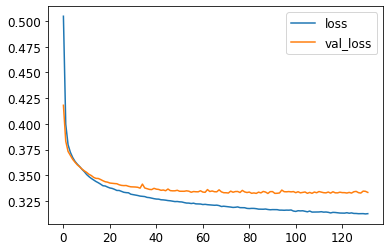

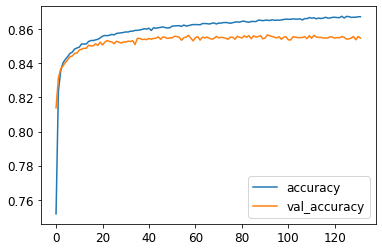

In [131]:
# history
history_df = pd.DataFrame(history.history)
history_df[["loss","val_loss"]].plot();
history_df[["accuracy","val_accuracy"]].plot();

In [132]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [133]:
# confusion matrix
print(f"confusion_matrix:\n {confusion_matrix(y_test,y_pred)}")

confusion_matrix:
 [[21017  1081]
 [ 3010  3331]]


In [134]:
# report
print(f"classification_report:\n {classification_report(y_test,y_pred)}")
print('Testing Accuracy: ',accuracy_score(y_test,y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22098
           1       0.75      0.53      0.62      6341

    accuracy                           0.86     28439
   macro avg       0.81      0.74      0.77     28439
weighted avg       0.85      0.86      0.85     28439

Testing Accuracy:  0.8561482471254264


### Second ANN

I want to increase the number of neurons, to see if there will be any difference in the result.

In [135]:
# building the NN
model=Sequential()
model.add(Dense(units=32, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(units=32, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=16, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=8, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                3808      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                

In [136]:
# Compiling the ANN
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [137]:
# Train the ANN
epochs = 150
batch_size = 32
earlystopping=EarlyStopping(monitor='val_loss', min_delta=0.001, patience=50, restore_best_weights=True)

# calculate execution time
start = time.time()

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    callbacks=[earlystopping], validation_data=(X_test,y_test))

# calculate execution time
end = time.time()
diff = (end - start)/60
print('Execution time with GPU (min): %.2f' % diff)

Epoch 1/150
3555/3555 [==============================] - 12s 3ms/step - loss: 0.4529 - accuracy: 0.7973 - val_loss: 0.3955 - val_accuracy: 0.8261
Epoch 2/150
3555/3555 [==============================] - 13s 4ms/step - loss: 0.3865 - accuracy: 0.8316 - val_loss: 0.3740 - val_accuracy: 0.8376
Epoch 3/150
3555/3555 [==============================] - 12s 3ms/step - loss: 0.3718 - accuracy: 0.8393 - val_loss: 0.3670 - val_accuracy: 0.8406
Epoch 4/150
3555/3555 [==============================] - 12s 3ms/step - loss: 0.3646 - accuracy: 0.8437 - val_loss: 0.3631 - val_accuracy: 0.8435
Epoch 5/150
3555/3555 [==============================] - 13s 4ms/step - loss: 0.3601 - accuracy: 0.8450 - val_loss: 0.3599 - val_accuracy: 0.8450
Epoch 6/150
3555/3555 [==============================] - 12s 3ms/step - loss: 0.3570 - accuracy: 0.8461 - val_loss: 0.3584 - val_accuracy: 0.8453
Epoch 7/150
3555/3555 [==============================] - 13s 4ms/step - loss: 0.3536 - accuracy: 0.8472 - val_loss: 0.3562 -

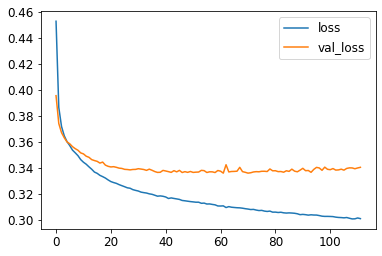

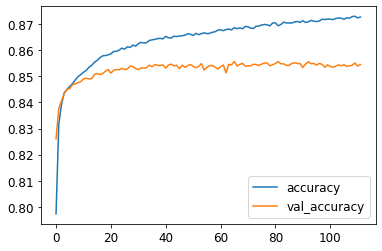

In [138]:
# history
history_df = pd.DataFrame(history.history)
history_df[["loss","val_loss"]].plot();
history_df[["accuracy","val_accuracy"]].plot();

In [139]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [140]:
# confusion matrix
print(f"confusion_matrix:\n {confusion_matrix(y_test,y_pred)}")

confusion_matrix:
 [[20872  1226]
 [ 2917  3424]]


In [141]:
# report
print(f"classification_report:\n {classification_report(y_test,y_pred)}")
print('Testing Accuracy: ',accuracy_score(y_test,y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     22098
           1       0.74      0.54      0.62      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.74      0.77     28439
weighted avg       0.85      0.85      0.85     28439

Testing Accuracy:  0.8543197721438869


### Third ANN

I want to change the number of layers from 5 to 4 and drop a Dropout layer, to see if there will be any difference in the result.

In [142]:
# building the NN
model=Sequential()
model.add(Dense(units=32, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(units=16, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=8, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                3808      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


In [143]:
# Compiling the ANN
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [144]:
# Train the ANN
epochs = 150
batch_size = 32
earlystopping=EarlyStopping(monitor='val_loss', min_delta=0.001, patience=50, restore_best_weights=True)

# calculate execution time
start = time.time()

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    callbacks=[earlystopping], validation_data=(X_test,y_test))

# calculate execution time
end = time.time()
diff = (end - start)/60
print('Execution time with GPU (min): %.2f' % diff)

Epoch 1/150
3555/3555 [==============================] - 12s 3ms/step - loss: 0.4746 - accuracy: 0.7890 - val_loss: 0.4098 - val_accuracy: 0.8172
Epoch 2/150
3555/3555 [==============================] - 12s 3ms/step - loss: 0.3943 - accuracy: 0.8271 - val_loss: 0.3794 - val_accuracy: 0.8338
Epoch 3/150
3555/3555 [==============================] - 11s 3ms/step - loss: 0.3749 - accuracy: 0.8377 - val_loss: 0.3686 - val_accuracy: 0.8393
Epoch 4/150
3555/3555 [==============================] - 12s 3ms/step - loss: 0.3665 - accuracy: 0.8414 - val_loss: 0.3656 - val_accuracy: 0.8407
Epoch 5/150
3555/3555 [==============================] - 12s 3ms/step - loss: 0.3618 - accuracy: 0.8438 - val_loss: 0.3608 - val_accuracy: 0.8443
Epoch 6/150
3555/3555 [==============================] - 12s 3ms/step - loss: 0.3592 - accuracy: 0.8449 - val_loss: 0.3585 - val_accuracy: 0.8448
Epoch 7/150
3555/3555 [==============================] - 11s 3ms/step - loss: 0.3562 - accuracy: 0.8467 - val_loss: 0.3563 -

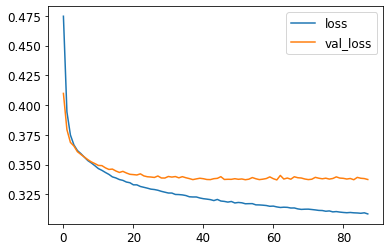

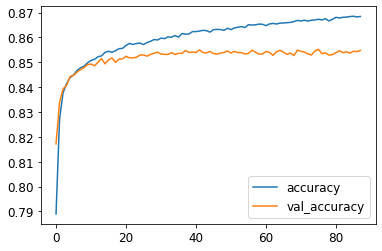

In [145]:
# history
history_df = pd.DataFrame(history.history)
history_df[["loss","val_loss"]].plot();
history_df[["accuracy","val_accuracy"]].plot();

In [146]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [147]:
# confusion matrix
print(f"confusion_matrix:\n {confusion_matrix(y_test,y_pred)}")

confusion_matrix:
 [[21004  1094]
 [ 3037  3304]]


In [148]:
# report
print(f"classification_report:\n {classification_report(y_test,y_pred)}")
print('Testing Accuracy: ',accuracy_score(y_test,y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22098
           1       0.75      0.52      0.62      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.74      0.76     28439
weighted avg       0.85      0.85      0.84     28439

Testing Accuracy:  0.8547417279088576


### ANN Summary

* First ANN: trainable parameters: 3,071, Epoch 132/150, 27 min, Testing Accuracy: 0.8561, True positives: 21017, True negatives: 3331 (correct predictions: 21017+3331=24348)
 
* Second ANN: trainable parameters: 5,537, Epoch 112/150, 23 min, Testing Accuracy: 0.8543, True positive: 20872, True negative: 3424 (correct predictions: 20872+3424=24296)

* Third ANN: Trainable parameters: 4.481, Epoch 88/150, 17 minutes, Test accuracy: 0.8547, True positive: 21004, True negative: 3304 (correct predictions: 21004+3304=24308)

The best accuracy was obtained with the first ANN, which was also the slower one. In addition, this ANN obtained the highest number of correct predictions (24348). 
This behavior is strange because accuracy decreased by increasing the number of neurons, from the frst ANN to the second one. This led me to think that the increased number of neurons does not necessarily lead to increased performance, but that the architecture of the network is more important. However, in this case the architecture is the same, so this difference in accuracy could be due to an unpredictable factor that I did not take into account or simple randomness (which I tried to eliminate by introducing the random starting seed).
The third ANN has a better accuracy score and correct predictions than the second one, with fewer layers. This could confirm the importance of architecture, as I mentioned above.

By the way, these results are better than the Logistic Regression model (test accuracy 0.8455) and the GridSearchCV model (test accuracy 0.8456).

Certainly many further tests could be performed, such as changing the number of layers or neurons, but for reasons of time I stopped here. I have seen that the number of neurons is not proportional to the improvement in accuracy, but a smarter architecture is perhaps the better choice.
It is also important to mention the trade-off between accuracy and machine wall time, which is a key parameter to consider before running this type of calculations. Other further possible tests could be done by changing the model.

### Random Forest

Random Forests are one of the most powerful ML analysis algorithms available today. A Random Forest is a set of decision trees, usually trained by the bagging (sometimes pasting) method.

Decision trees are very versatile ML algorithms:
* they can perform classification and regression tasks (including multi-output)
* are powerful enough to be able to adapt to complex data sets.

It would be interesting to see the prediction accuracy with a Random Forest model.

In [149]:
# check if y_train contains 0 and 1. If not, uncomment next 5 and 6 lines in order to prevent the Error Nan at line 11
# if contains NAN values try reopening the notbook and run from the beginning
# alternatively do nothing and let run the next cell
y_train

18401     0
127797    1
40012     0
130914    0
41742     0
         ..
112920    1
122810    0
106280    0
135107    1
124925    0
Name: RainTomorrow, Length: 113754, dtype: int64

In [150]:
# If condition to solve the error
from sys import exit

check1 = "Yes"
check2 = "NAN"
if check1 in y_train:
  y_train = y_train.map(dict({'Yes':1, 'No':0})) 
  y_test = y_test.map(dict({'Yes':1, 'No':0}))
elif check2 in y_train:
  print('try re-opening the notebook and run from the beginning')
  exit()
else:
  print('ok, y_train contains 0 and 1')
  pass

ok, y_train contains 0 and 1


In [151]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)  

# encoding 'Yes' and 'No' into 1 and 0
#y_train = y_train.map(dict({'Yes':1, 'No':0}))    # uncomment this line
#y_test = y_test.map(dict({'Yes':1, 'No':0}))      # uncomment this line

# calculate execution time
start = time.time()

model_rf.fit(X_train, y_train)  # frequent NAN error

# calculate execution time
end = time.time()
diff = (end - start)/60
print('Execution time with GPU (min): %.2f' % diff)

y_pred = model_rf.predict(X_test)
y_pred = (y_pred > 0.5)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred))

Execution time with GPU (min): 3.19
Testing Accuracy:  0.8536165125356026


In [152]:
# confusion matrix
print(f"confusion_matrix:\n {confusion_matrix(y_test,y_pred)}")

confusion_matrix:
 [[20952  1146]
 [ 3017  3324]]


The accuracy obtained is comparable to previous results,  better than GridSearchCV but worse than ANN, even in the number of correct predictions. But the wall time for ANN was on average 22 minutes instead of 3 minutes for Random Forsest (+730%). Is it worth the 0.3% increase in accuracy?

 

1.   First ANN - testing Accuracy: 0.8561 - correct predictions: 24348
2.   Random Forest - testing Accuracy: 0.8536 - correct predictions: 24276
3. GridSearchCV - testing Accuracy: 0.8456 - correct predictions: 24047
4. Logistic Regression - testing Accuracy: 0.8455 - correct predictions: 24045


### XGBoost

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. It is designed to be fast, scalable and portable.

The list of hyperparameters is huge. Most important ones:
* n_estimators (and early stopping) - how many subtrees will be trained
* max_depth - the maximum tree depth each individual tree can grow to (default=6)
* reg_alpha and reg_lambda - control the L1 and L2 regularisation terms (lambda default=1, alpha default=0)
* learning rate

In [155]:
from xgboost import XGBClassifier

# if error: remove duplicated columns in the X_train Dataframe
# X_train = X_train.loc[:,~X_train.columns.duplicated()]

model_xgb = XGBClassifier(n_estimators=500, max_depth=16)

# calculate execution time
start = time.time()

model_xgb.fit(X_train, y_train)

# calculate execution time
end = time.time()
diff = (end - start)/60
print('Execution time with GPU (min): %.2f' % diff)

Execution time with GPU (min): 12.64


In [157]:
# if error: remove duplicated columns in the X_test Dataframe
# X_test = X_test.loc[:,~X_test.columns.duplicated()]

y_pred = model_xgb.predict(X_test)
y_pred = (y_pred > 0.5)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred))

Testing Accuracy:  0.8658180667393368


In [158]:
# confusion matrix
print(f"confusion_matrix:\n {confusion_matrix(y_test,y_pred)}")

confusion_matrix:
 [[20965  1133]
 [ 2683  3658]]


XGBoost seems to be the best method so far:


1. XGBoost - testing accuracy: 0.8658 - time (GPU): 12.64 min - correct predictions: 24623
2. First ANN - testing Accuracy: 0.8561 - time (GPU): 27.21 min - correct predictions: 24348
3. Random Forest - testing Accuracy: 0.8536 - time (GPU): 3.19 min  - correct predictions: 24276
4. GridSearchCV - testing Accuracy: 0.8456 - time (GPU): 3.24 min - correct predictions: 24047
5. Logistic Regression - testing Accuracy: 0.8455 - time (GPU): 0.04 min - correct predictions: 24045

## Conslusions

I tried the most popular models for this type of dataset and they all gave comparable results, more or less around 85% accuracy. This value is what I expected from this type of dataset, looking online for other results. 
Based on my tests, I got:
* The best results using XGBoost with 86.58%
* ANN (MPL) is also a good model, but the wall time doubles that of XGBoost and is about 7 times that of Random Forest. Perhaps improvement could be seen with a more complex architecture, but you always have to evaluate the computational time and hardware power available. 
* Random Forest is an excellent model, especially for its speed and ease of configuration, as is GridSearchCV. 
* The Logistic Regressor model is perhaps too simple to beat the others and is probably a more educational choice.

Certainly there are many other tests that could be done, especially since each algorithm has its own many parameters to tune, but I had to make choices because of limited time, especially since the goal of this project is educational.

## References

This project was inspired by:
* The class notebooks and lessons (AML Basic and Advanced, A.Y. 2021/2022)
* Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron
* Web searches

## Disclaimer

My goals for this project were to get a feel for a Machine Learning workflow and to learn as much as I could in a very limited amount of time because of my research work. Also, before starting this course, my initial skills even in Python coding were absolutely zero, so I consider this project a success for me. 

I think I have a pretty good understanding of what I have done and surely there are definitely a lot of mistakes, hopefully they are grammatical instead of conceptual.

I am not sure if I will continue with ML in the future, but I will definitely, as a computationalist, introduce (and have already done) Python coding into my daily workflow.

If you have any questions, I will be glad to answer them.

Thank you for all.